In [1]:
link_california = r'https://raw.githubusercontent.com/Danieloliver1/UFC_mestrado/main/Sigaa_UFC/1_semestre/aprendizagem_automatica/lista_01_ama/california.csv?token=GHSAT0AAAAAACPK6ODCUTNZK2BYDXYRMRS4ZPMUVUQ'


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np



sns.set_palette("Accent")
sns.set_style("darkgrid")
dados = np.genfromtxt( link_california, delimiter=',') # numpy

In [6]:

# passando os valore de x
# Selecionando todas as colunas exceto a última
X = dados[:,:-1]

# passando os valore de y
# Pegando somente a última coluna
y = dados[:, -1]

In [54]:
# 1. Normalizar os dados de entrada usando MinMaxScaler
normalizando_minmax = MinMaxScaler()
x_normalizando = normalizando_minmax.fit_transform(X)


# 2. Normalizar os dados de saída usando StandardScaler
standard_scaler = StandardScaler()
y_normalizando = standard_scaler.fit_transform(y.reshape(-1, 1)).flatten()

# Dividir os dados em conjuntos de treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x_normalizando, y_normalizando, test_size=0.2, random_state=42)


array([[0.05216467, 0.78      , 0.11500282, ..., 0.15580133, 0.40601504,
        0.52243959],
       [0.50524025, 0.22      , 0.2511198 , ..., 0.2518248 , 0.11170784,
        0.74683544],
       [0.14453726, 1.        , 0.13793306, ..., 0.25069717, 0.15574651,
        0.67779056],
       ...,
       [0.16626788, 0.64      , 0.17374373, ..., 0.37930162, 0.16756176,
        0.78596087],
       [0.28707357, 0.26      , 0.20472439, ..., 0.25412883, 0.45864662,
        0.51668585],
       [0.81672404, 1.        , 0.30778384, ..., 0.22504574, 0.566058  ,
        0.22439586]])

In [37]:
# Definindo uma lista para armazenar os RMSEs
rmse_por_grau = []

# Definir o intervalo de graus de polinômio
graus = list(range(1, 14))

# Loop sobre os diferentes graus de polinômio
for grau in graus:
    # Gerar características polinomiais até o grau especificado para os conjuntos de treinamento e teste
    poly_features = PolynomialFeatures(degree=grau)
    x_poly_treino = poly_features.fit_transform(x_treino)
    x_poly_teste = poly_features.transform(x_teste)

    # Inicializar e treinar o modelo de regressão linear com os dados de treinamento
    modelo_regressao = LinearRegression()
    modelo_regressao.fit(x_poly_treino, y_treino)  # Normalizamos os rótulos (y)

    # Fazer previsões para o conjunto de teste
    y_pred_teste_normalizado = modelo_regressao.predict(x_poly_teste)

    # Desnormalizar as previsões para obter as previsões finais
    y_pred_teste = standard_scaler.inverse_transform(y_pred_teste_normalizado.reshape(-1, 1)).flatten()

    # Calcular o RMSE no conjunto de teste
    rmse_teste = np.sqrt(mean_squared_error(y_teste, y_pred_teste))

    # Armazenar o RMSE para o grau atual na lista
    rmse_por_grau.append(rmse_teste)

    # Imprimir o RMSE para o grau atual
    print(f"RMSE para o grau {grau}: {rmse_teste}")



RMSE para o grau 1: 2.1991912099781015
RMSE para o grau 2: 2.138589715974315
RMSE para o grau 3: 4.661022174970241
RMSE para o grau 4: 142.91015857012366
RMSE para o grau 5: 260.6792430186405
RMSE para o grau 6: 2140.4527399301005
RMSE para o grau 7: 1606.4014244639134
RMSE para o grau 8: 1010.8548457861069
RMSE para o grau 9: 348.51772183069994
RMSE para o grau 10: 243.70842081442342
RMSE para o grau 11: 640.7530827625532
RMSE para o grau 12: 916.2488927598629
RMSE para o grau 13: 1093.347659321324


In [59]:
x_poly_treino.shape

(800, 203490)

In [44]:
# Definindo uma lista para armazenar os RMSEs
rmse_por_grau = []

# Definir o intervalo de graus de polinômio
graus = list(range(1, 14))

# Loop sobre os diferentes graus de polinômio
for grau in graus:
    # Gerar características polinomiais até o grau especificado para os conjuntos de treinamento e teste
    poly_features = PolynomialFeatures(degree=grau)
    x_poly_treino = poly_features.fit_transform(x_treino)

    # Inicializar e treinar o modelo de regressão linear com os dados de treinamento
    modelo_regressao = LinearRegression()
    modelo_regressao.fit(x_poly_treino, y_treino)  # Normalizamos os rótulos (y)

    # Fazer previsões para o conjunto de treinamento
    y_pred_treino_normalizado = modelo_regressao.predict(x_poly_treino)

    # Desnormalizar as previsões para obter as previsões finais
    y_pred_treino = standard_scaler.inverse_transform(y_pred_treino_normalizado.reshape(-1, 1)).flatten()

    # Calcular o RMSE no conjunto de treinamento
    rmse_treino = np.sqrt(mean_squared_error(y_treino, y_pred_treino))

    # Armazenar o RMSE para o grau atual na lista
    rmse_por_grau.append(rmse_treino)

    # Imprimir o RMSE para o grau atual
    print(f"RMSE para o grau {grau}: {rmse_treino}")


RMSE para o grau 1: 2.1810060192891663
RMSE para o grau 2: 2.160659859765793
RMSE para o grau 3: 2.1458937608417332
RMSE para o grau 4: 2.1248927515431015
RMSE para o grau 5: 2.109130019200071
RMSE para o grau 6: 2.1091300192276754
RMSE para o grau 7: 2.1091300192320075
RMSE para o grau 8: 2.1091300192240277
RMSE para o grau 9: 2.1091300192278997
RMSE para o grau 10: 2.1091300192321425
RMSE para o grau 11: 2.1091300192331315
RMSE para o grau 12: 2.1091300192303675
RMSE para o grau 13: 2.109130019238187


In [51]:
rmse_por_grau

[2.1810060192891663,
 2.160659859765793,
 2.1458937608417332,
 2.1248927515431015,
 2.109130019200071,
 2.1091300192276754,
 2.1091300192320075,
 2.1091300192240277,
 2.1091300192278997,
 2.1091300192321425,
 2.1091300192331315,
 2.1091300192303675,
 2.109130019238187]

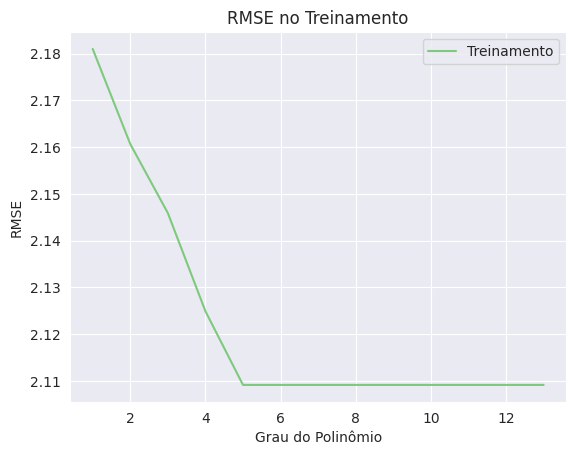

In [52]:
#Plotar RMSE no treinamento
plt.plot(range(1, len(graus)+1), rmse_por_grau, label='Treinamento')
plt.xlabel('Grau do Polinômio')
plt.ylabel('RMSE')
plt.title('RMSE no Treinamento')
plt.legend()
plt.show()
